<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/TensorFlow_Image_Calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the needed libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#We will be importing and using the mnist fashion dataset


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Preprocessing the data

In [5]:
print(f"train_images: {training_images.shape}")
print(f"test_images: {testing_images.shape}")
print(f"labels: {len(class_names)}")
print(f"train_labels:{training_labels.shape}")
print(f"testing_labels: {testing_labels.shape}")
print(class_names[:])

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)
labels: 10
train_labels:(60000,)
testing_labels: (10000,)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


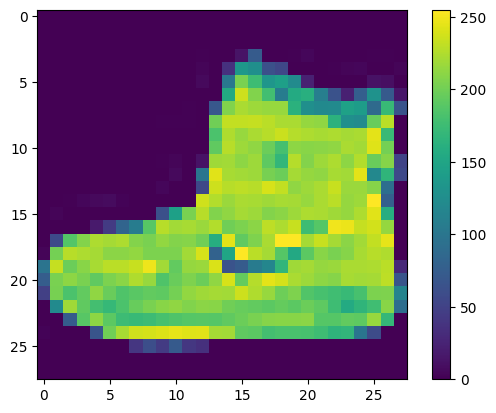

In [6]:
plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

As it can be seen, the color scales range from 0 to 255. we need to scale them down to 0 and 1.

In [7]:
train_images = training_images/255
test_images = testing_images/255
print(f"Train_images: {train_images.shape}")

Train_images: (60000, 28, 28)


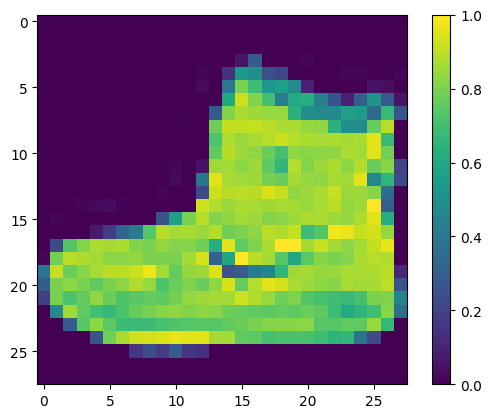

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

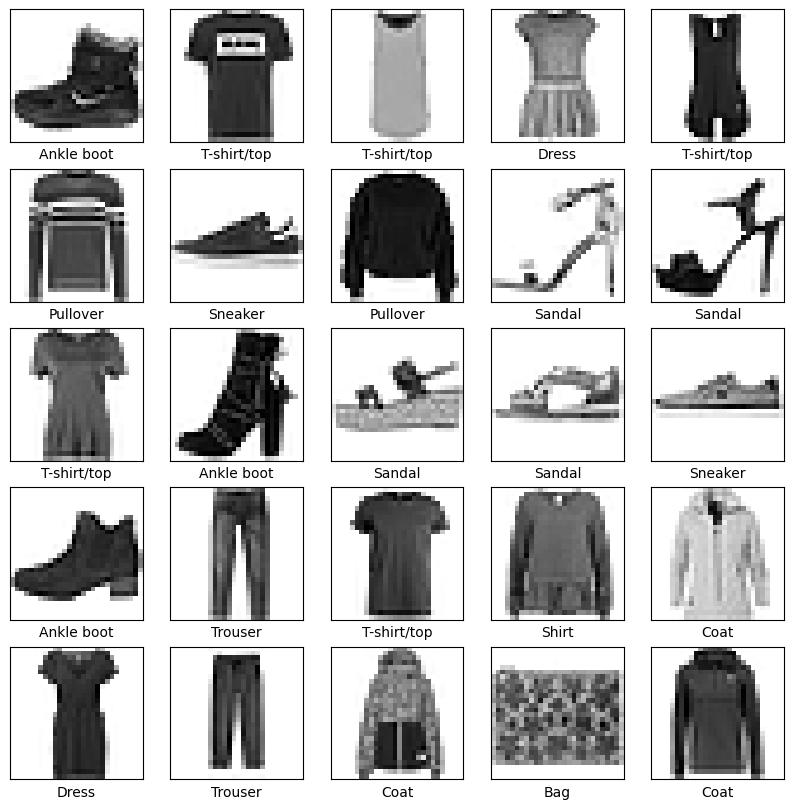

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

Build the model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


Let us now train our model

In [12]:
model.fit(train_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7807 - loss: 0.6269
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8604 - loss: 0.3917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8765 - loss: 0.3410
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8833 - loss: 0.3199
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8886 - loss: 0.2983
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8946 - loss: 0.2795
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9032 - loss: 0.2630
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9051 - loss: 0.2553
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9070 - loss: 0.2466
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9105 - loss: 0.2386


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

Evaluate accuracy
Next, we compare how the model performs on the test dataset:

In [13]:
test_loss, test_acc = model.evaluate(test_images, testing_labels, verbose = 2)
print(f"\nTest Accuracy:{test_acc}")

313/313 - 2s - 6ms/step - accuracy: 0.8842 - loss: 0.3322

Test Accuracy:0.8841999769210815


Make predictions

With the model trained, you can use it to make predictions about some images. However, we will have to atttach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.



In [14]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [16]:
#Let us maake preedictions on the test images
test_preds=prob_model.predict(test_images)
#print index 0
print(test_preds[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[9.0525810e-07 1.8565540e-11 1.0939958e-08 5.9626554e-11 3.2232647e-06
 9.5520085e-03 1.6703005e-07 2.9543899e-02 3.1866770e-07 9.6089947e-01]


In [20]:
np.argmax(test_preds[10])

4

Define functions to graph the full set of 10 class predictions.



In [22]:
def plot_img_pred(i, predictions_array, true_label, img):
  true_label, img = true_label[i],  img[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color="Blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  plt.grid(False)
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label=np.argmax(predictions_array)
  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

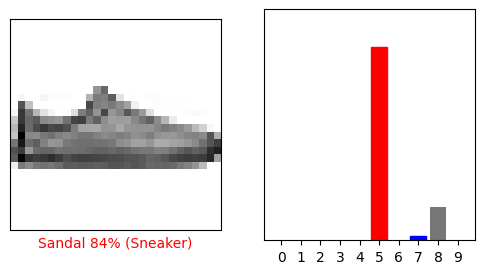

In [26]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img_pred(i, test_preds[i], testing_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, test_preds[i],  testing_labels)
plt.show()

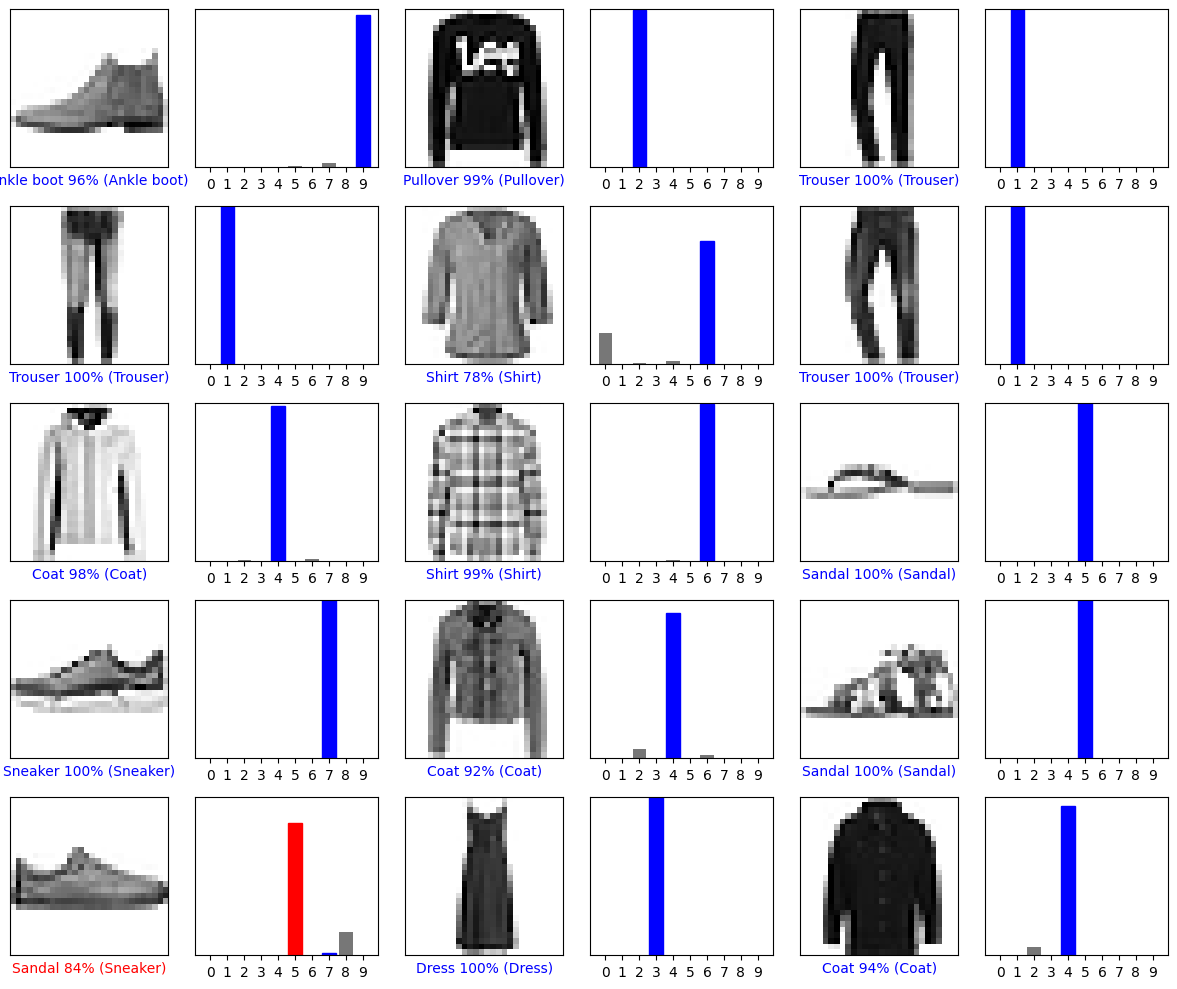

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_img_pred(i, test_preds[i], testing_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, test_preds[i], testing_labels)
plt.tight_layout()
plt.show()

In [37]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [39]:
prob_model_2  = tf.keras.Sequential([
    model_2,
    tf.keras.layers.Softmax()
])

In [50]:
# More complex model
from tensorflow.keras.preprocessing import image
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])
tf.keras.Sequential([
    model_2,
    tf.keras.layers.Softmax()
])
model3.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])


# Assuming model3 is your trained model

# Load and preprocess the image
img_path = "/content/20240820_191213.jpg"
pred_image = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(pred_image)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Predict the label of the image
my_predictions = prob_model3.predict(img_array)

# Get the predicted label (index of the highest probability)
my_predicted_label = np.argmax(my_predictions)

# Define the clothing items mapping
def get_clothing_item(predicted_label):
    switcher = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot"
    }
    return switcher.get(predicted_label, "Invalid number")

# Get the clothing item corresponding to the predicted label
clothing_item = get_clothing_item(my_predicted_label)
print(f"The clothing item you provided is: {clothing_item}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The clothing item you provided is: Ankle boot
